## Image_Classification_of_an_American_Sign_Language   

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       20

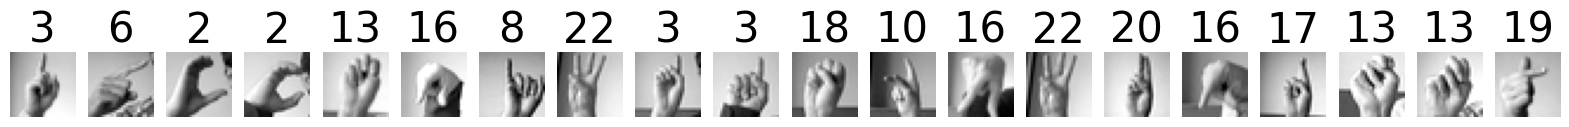

x_train min: 0.0
x_train max: 1.0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │        12,825 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 677,401 (2.58 MB)

 Trainable params: 677,401 (2.58 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3323 - loss: 2.2009 - val_accuracy: 0.5524 - val_loss: 1.3686
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7692 - loss: 0.7150 - val_accuracy: 0.7214 - val_loss: 0.8890
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8886 - loss: 0.3371 - val_accuracy: 0.6949 - val_loss: 1.1046
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9435 - loss: 0.1739 - val_accuracy: 0.7666 - val_loss: 0.8713
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9711 - loss: 0.1013 - val_accuracy: 0.7610 - val_loss: 1.0288
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9597 - loss: 0.1226 - val_accuracy: 0.7577 - val_loss: 0.9251
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9759 - loss: 0.0802 - val_accuracy: 0.7861 - val_loss: 1.1363
Epoch 8/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9638 - loss: 0.1128 - val_accuracy: 0.

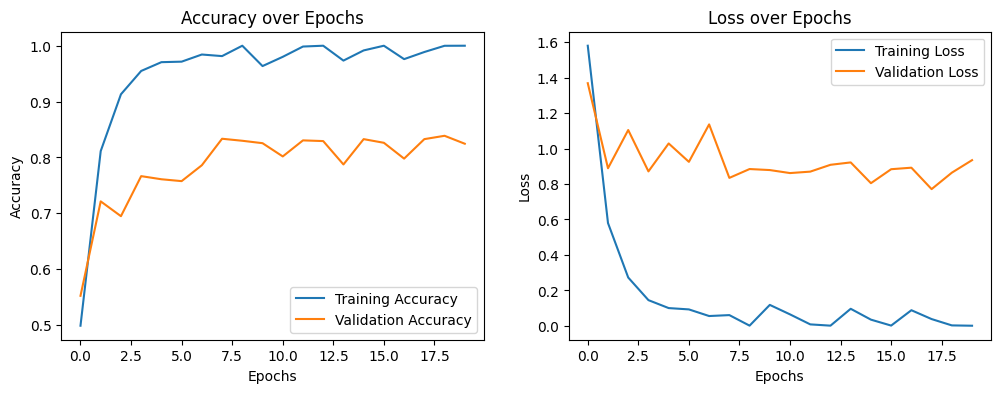

In [2]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import random

# Loading the CSV files into data frames
train_df = pd.read_csv('sign_mnist_train.csv')
test_df = pd.read_csv('sign_mnist_test.csv')

# Exploring the data
print(train_df.head())

# Extracting the labels
y_train = train_df['label']
y_test = test_df['label']
train_df = train_df.drop(columns=['label'])
test_df = test_df.drop(columns=['label'])

# Extracting the images
x_train = train_df.values
x_test = test_df.values

# Summarizing the training and validation data
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Visualizing the data
plt.figure(figsize=(20, 20))
num_images = 20
for i in range(num_images):
    row = x_train[i]
    label = y_train[i]
    image = row.reshape(28, 28)
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')
plt.show()

# Normalize the image data
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encoding the labels
y_train = keras.utils.to_categorical(y_train, num_classes=25)
y_test = keras.utils.to_categorical(y_test, num_classes=25)

# Summarizing the training data after normalization
print(f"x_train min: {x_train.min()}")
print(f"x_train max: {x_train.max()}")

# Build the NN Model
model = keras.Sequential()
model.add(layers.Dense(units=512, activation='relu', input_shape=(784,)))
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(units=25, activation='softmax'))

# Model summary
model.summary()

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Run the model
history = model.fit(x_train, y_train, epochs=20, verbose=1, validation_data=(x_test, y_test))

# Evaluate the model
accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
print(f"Training accuracy: {accuracy}")
print(f"Validation accuracy: {val_accuracy}")

# Plotting accuracy and loss over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


## Accuracy of the model

Training accuracy, which should ideally be close to 100%, indicates how successfully the model identified patterns in the training set. Measuring validation accuracy on hypothetical data reveals how well the model generalizes. A large discrepancy between high training and low validation accuracy points to overfitting, in which noise in the training set is captured by the model but not in the fresh data. This may be shown by plotting accuracy and loss over epochs; overfitting is indicated by growing training accuracy combined with plateauing or dropping validation accuracy. The model should ideally perform well on both known and fresh data, as evidenced by high and closely matched training and validation accuracies.